# REGRESSION ANALYTICS
**Author - Dev**

Importing numpy, pandas and matplot modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Reading the houseprice csv file: 

In [2]:
df=pd.read_csv("/Users/devmarwah/Downloads/House_Prices.csv")
# Printing head of our data to get a quick glance at it: 
df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,YrSold,SalePrice
0,8450,7,2003,2003,706,2,1,3,8,0,548,2008,208500
1,9600,6,1976,1976,978,2,0,3,6,1,460,2007,181500
2,11250,7,2001,2002,486,2,1,3,6,1,608,2008,223500
3,9550,7,1915,1970,216,1,0,3,7,1,642,2006,140000
4,14260,8,2000,2000,655,2,1,4,9,1,836,2008,250000


Reading prediction file now: 

In [3]:
#Using read_excel command to read excel file:
df_test=pd.read_excel("/Users/devmarwah/Downloads/BA-Predict-2.xlsx")
df_test.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,YrSold,SalePrice
0,7340,4,1971,1971,322,1,0,2,4,0,684,2007,110000
1,8712,5,1957,2000,860,1,0,2,5,0,756,2009,153000
2,7875,7,2003,2003,0,2,1,3,8,1,393,2006,180000
3,14859,7,2006,2006,0,2,0,3,7,1,690,2006,240000
4,6173,5,1967,1967,599,1,0,3,6,0,288,2007,125500


**DATA PREPRATION:**

Checking number of rows and columns in our data:

In [4]:
df.shape

(900, 13)

Having a look at structure of our data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       900 non-null    int64
 1   OverallQual   900 non-null    int64
 2   YearBuilt     900 non-null    int64
 3   YearRemodAdd  900 non-null    int64
 4   BsmtFinSF1    900 non-null    int64
 5   FullBath      900 non-null    int64
 6   HalfBath      900 non-null    int64
 7   BedroomAbvGr  900 non-null    int64
 8   TotRmsAbvGrd  900 non-null    int64
 9   Fireplaces    900 non-null    int64
 10  GarageArea    900 non-null    int64
 11  YrSold        900 non-null    int64
 12  SalePrice     900 non-null    int64
dtypes: int64(13)
memory usage: 91.5 KB


Having a look at basic statistics of our data:

In [6]:
df.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,YrSold,SalePrice
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10794.603333,6.135556,1971.445556,1985.333333,446.532222,1.564444,0.385556,2.843333,6.482222,0.627778,472.608889,2007.843333,183107.923333
std,11942.213564,1.378954,30.008422,20.336819,446.515059,0.555348,0.498287,0.817570,1.612905,0.658905,208.850262,1.321050,81908.182659
min,1491.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2006.000000,34900.000000
25%,7585.250000,5.000000,1954.000000,1967.750000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,336.000000,2007.000000,130000.000000
50%,9441.500000,6.000000,1973.000000,1994.000000,384.000000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,2008.000000,163000.000000
75%,11618.250000,7.000000,2000.000000,2004.000000,728.750000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,2009.000000,216877.750000
max,215245.000000,10.000000,2010.000000,2010.000000,2260.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1390.000000,2010.000000,755000.000000


Looking for missing values in our data: 

In [7]:
df.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF1      0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

Hecnce, our data does not have any missing values. Therefore, there is no need to omit missing values. 

**DATA EXPLORATION**

Now, we will explore our data with some plots: 

In [8]:
df.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'YrSold', 'SalePrice'],
      dtype='object')

PLotting histogram of all columns: 

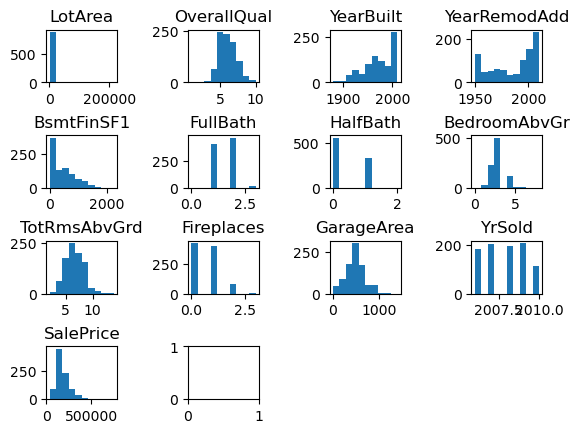

In [9]:
try:
    for i in range(0,15):
        plt.subplot(4,4,i+1)
        plt.hist(df.iloc[:,i])
        plt.title(df.columns[i])
except IndexError: 
    pass
plt.subplots_adjust(wspace=1,hspace=1)

Plotting correlation plot of the data: 

In [10]:
cor=df.corr()
cor.style.background_gradient(cmap='coolwarm')

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,YrSold,SalePrice
LotArea,1.000000,0.096209,0.007639,0.012302,0.207035,0.128547,-0.002609,0.089578,0.153195,0.265592,0.152720,-0.021080,0.264372
OverallQual,0.096209,1.000000,0.569225,0.547469,0.227359,0.550709,0.304286,0.112591,0.458702,0.393486,0.598166,-0.048780,0.796213
YearBuilt,0.007639,0.569225,1.000000,0.569604,0.264598,0.462667,0.275349,-0.046072,0.128530,0.164903,0.496031,0.008918,0.526634
YearRemodAdd,0.012302,0.547469,0.569604,1.000000,0.132207,0.434997,0.205962,0.004014,0.238986,0.122247,0.379742,0.036270,0.522177
BsmtFinSF1,0.207035,0.227359,0.264598,0.132207,1.000000,0.052841,-0.003028,-0.116004,0.059287,0.292978,0.286956,-0.000784,0.404663
FullBath,0.128547,0.550709,0.462667,0.434997,0.052841,1.000000,0.129185,0.364024,0.566318,0.225219,0.410507,-0.020337,0.558013
HalfBath,-0.002609,0.304286,0.275349,0.205962,-0.003028,0.129185,1.000000,0.203046,0.331714,0.217375,0.218421,-0.023044,0.304740
BedroomAbvGr,0.089578,0.112591,-0.046072,0.004014,-0.116004,0.364024,0.203046,1.000000,0.671454,0.075402,0.081228,-0.028930,0.164427
TotRmsAbvGrd,0.153195,0.458702,0.128530,0.238986,0.059287,0.566318,0.331714,0.671454,1.000000,0.310384,0.361964,-0.068914,0.577358
Fireplaces,0.265592,0.393486,0.164903,0.122247,0.292978,0.225219,0.217375,0.075402,0.310384,1.000000,0.266260,-0.061957,0.468628


We can notice that TotRmsAbvGrd has a correlation more than 0.5 with FullBath and BedroomAbvGr. This will leaad to **Multicollinearity**. This means that our model can have unwanted errors and incorrect conclusions. Hence, we should remove TotRmsAbvGrd to avoid Multicollinearity.

In [11]:
#Removing TotRmsAvGrd
df=df.drop('TotRmsAbvGrd',axis=1)
df_test=df_test.drop('TotRmsAbvGrd',axis=1)

In [12]:
#Verifying that TotRmsAbvGrd was removed: 
try :
    df['TotRmsAbvGrd']
except KeyError:
    print('TotRmsAbvGrd has been removed')
    

TotRmsAbvGrd has been removed


Check for data types of all columns: 

In [13]:
df.dtypes

LotArea         int64
OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
BsmtFinSF1      int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
Fireplaces      int64
GarageArea      int64
YrSold          int64
SalePrice       int64
dtype: object

Here "OverallQual","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd","Fireplaces" and "YrSold" are catgorical variables and shoud be defined as factors instead. 

In [14]:
# Converting them to factors: 
df[["OverallQual","FullBath","HalfBath","BedroomAbvGr","Fireplaces","YrSold"]]=df[["OverallQual","FullBath","HalfBath","BedroomAbvGr","Fireplaces","YrSold"]].astype('category')
df.dtypes

LotArea            int64
OverallQual     category
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1         int64
FullBath        category
HalfBath        category
BedroomAbvGr    category
Fireplaces      category
GarageArea         int64
YrSold          category
SalePrice          int64
dtype: object

It can be seen that the required variables has been converted to categorical dtype. 

**REGRESSION ANALYTICS:**

In [15]:
df_test.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,YrSold,SalePrice
0,7340,4,1971,1971,322,1,0,2,0,684,2007,110000
1,8712,5,1957,2000,860,1,0,2,0,756,2009,153000
2,7875,7,2003,2003,0,2,1,3,1,393,2006,180000
3,14859,7,2006,2006,0,2,0,3,1,690,2006,240000
4,6173,5,1967,1967,599,1,0,3,0,288,2007,125500


Making training and testing sets

In [16]:
clf=linear_model.LinearRegression() #Making linear model from sklearn package
# Making training sets
x_train=df.drop('SalePrice',axis=1) 
y_train=df['SalePrice']
# Making testing sets
x_test=df_test.drop('SalePrice',axis=1)
y_test=df_test['SalePrice']

Using Linear model on training set and predicting on testing sets: 

In [17]:
t=clf.fit(x_train,y_train)
p=t.predict(x_test)

Calculating accuracy of our predictions: 

In [18]:
s=t.score(x_test,y_test)
s

0.7848875343057605

Hence, our model is approximately 78% accurate

Let's check for residuals

In [19]:
Residuals=y_test-p
Residuals.head() # Printing head() of residuals to have a look at them

0     6949.683131
1   -15360.161628
2   -28898.346175
3    13084.071876
4    14481.906981
Name: SalePrice, dtype: float64

Plotting residuals to better analyze them.

Text(0, 0.5, 'Residuals')

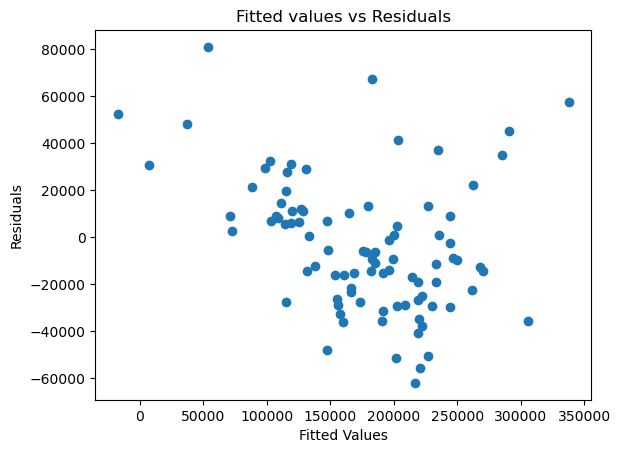

In [20]:
plt.scatter(p,Residuals)
plt.title('Fitted values vs Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Here, we can obsereve that graph between residuals ad fitted values is not suggesting any pattterns and seems random to us. This is exactly what we need. This goes with the assuptions of linear regression model that residuals should follow normal distribution.Hence, linear regression model is a good classifier choice for the given data.We can furthur verify the normal distribution of our residuals using a hist plot.  

(array([ 5.,  6., 16., 22., 16., 10.,  8.,  3.,  2.,  2.]),
 array([-61890.72732747, -47622.12076739, -33353.51420731, -19084.90764722,
         -4816.30108714,   9452.30547294,  23720.91203302,  37989.5185931 ,
         52258.12515318,  66526.73171327,  80795.33827335]),
 <BarContainer object of 10 artists>)

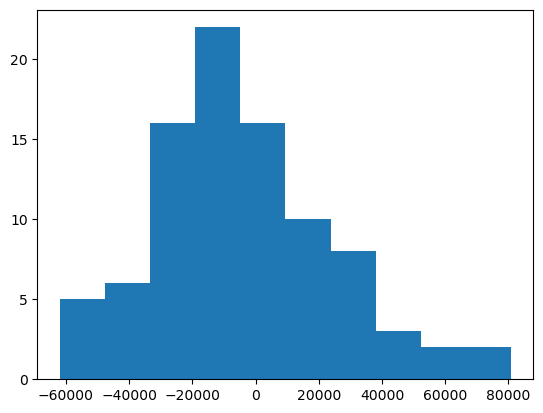

In [21]:
# Making a hist plot of residuals
plt.hist(Residuals)

Here also it is evident that residuals are distributed randomly and our model is good for out data.